In [ ]:
# Import dependencies
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

In [ ]:
#Load data 
df = pd.read_csv('Train.csv')

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.shape

(8523, 12)

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
#Check if There's missing values 
df.isnull().sum().max()

2410

In [ ]:
#Info about the data 
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Outlet Size and Item Weight have mssing values 

In [ ]:
print('Categorical Features are  : ',[col for col in df.columns if df[col].dtype == 'object'])

Categorical Features are  :  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [ ]:
#Trait Missing Values
# Imputation Replacing Item Weight with mean Value 
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [ ]:
df['Item_Weight'].isnull().sum()

0

In [ ]:
mode_outlet_size = df.pivot_table(values='Outlet_Size',columns=['Outlet_Type'],aggfunc={lambda x: x.mode()[0]})
print(mode_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
<lambda>            Small             Small            Medium            Medium


In [ ]:
missing_values = df['Outlet_Size'].isnull()
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [ ]:
df.loc[missing_values,'Outlet_Size'] = df.loc[missing_values,'Outlet_Type'].apply(lambda x : mode_outlet_size)

In [ ]:
df.isnull().sum().max()

0

In [ ]:
sns.set()

In [ ]:
print('Numerical Features are  : ',[col for col in df.columns if df[col].dtype != 'object'])

Numerical Features are  :  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


<Figure size 432x432 with 0 Axes>

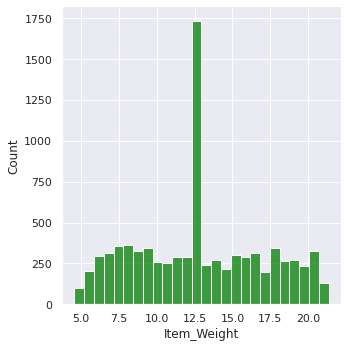

In [ ]:
  # Item_Weight Dsitribution
  plt.figure(figsize=(6,6))
  sns.displot(df['Item_Weight'],color='green')
  plt.show()

<Figure size 432x432 with 0 Axes>

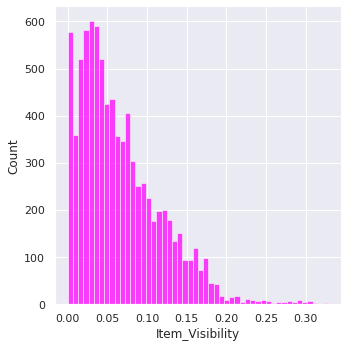

In [ ]:
 # Item_Visibility Dsitribution
plt.figure(figsize=(6,6))
sns.displot(df['Item_Visibility'],color='magenta')
plt.show()

<Figure size 432x432 with 0 Axes>

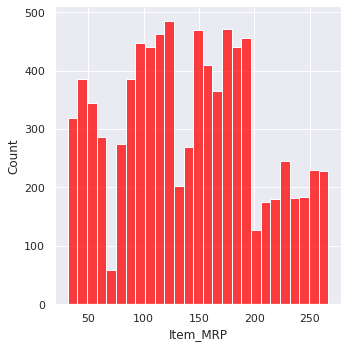

In [ ]:
 # Item_Visibility Dsitribution
plt.figure(figsize=(6,6))
sns.displot(df['Item_MRP'],color='red')
plt.show()

<Figure size 432x432 with 0 Axes>

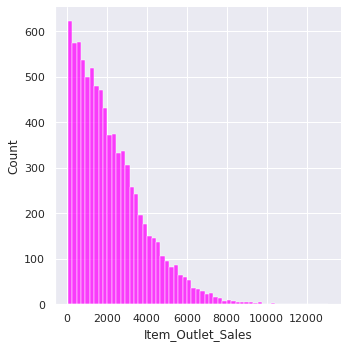

In [ ]:
 # Outlet Sales Dsitribution
plt.figure(figsize=(6,6))
sns.displot(df['Item_Outlet_Sales'],color='blue')
plt.show()

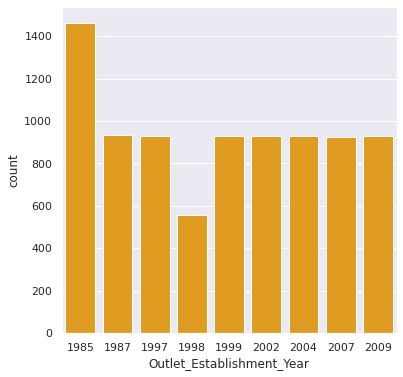

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x= 'Outlet_Establishment_Year' , data = df,color='orange')
plt.show()